In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



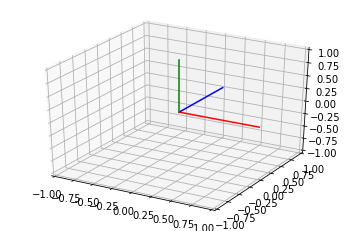

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

def plot_z_unit_axis(ax, z_offset):
    
    z = np.linspace(0 + z_offset, 1 + z_offset, 10)
    x = np.zeros(len(z))
    y = np.zeros(len(z))
    
    ax.plot3D(x, y, z, 'green')
    
def plot_x_unit_axis(ax, x_offset): 
    
    x = np.linspace(0 + x_offset, 1 + x_offset, 10)
    y = np.zeros(len(x))
    z = np.zeros(len(x))
    
    ax.plot3D(x, y, z, 'red')
    
def plot_y_unit_axis(ax, y_offset):
    
    y = np.linspace(0 + y_offset, 1 + y_offset, 10)
    x = np.zeros(len(y))
    z = np.zeros(len(y))
     
    ax.plot3D(x, y, z, 'blue')
    
    
def plot_coordinate_system(ax, x_off, y_off, z_off):
    
    plot_x_unit_axis(ax, x_off)
    plot_y_unit_axis(ax, y_off)
    plot_z_unit_axis(ax, z_off)
    
# Questions:

# How to rotate coordinate system for 90° for some axis 
# Basically we have to calculate origin of the coordinate system and then rotation about certain axis 

# How to plot with different origin  


plot_x_unit_axis(ax, 0)
plot_y_unit_axis(ax, 0)
plot_z_unit_axis(ax, 0)

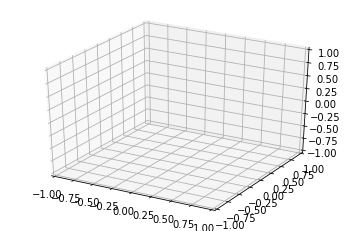

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

In [12]:
def get_x_axis(x_, y_, z_): 
    
    x = np.linspace(x_, x_ + 1, 10)
    y = np.ones(len(x)) * y_
    z = np.ones(len(x)) * z_
    
    return x, y, z

def get_y_axis(x_, y_, z_): 
    
    y = np.linspace(y_, y_ + 1, 10)
    x = np.ones(len(y)) * x_
    z = np.ones(len(y)) * z_
    
    return x, y, z
    
def get_z_axis(x_, y_, z_):

    z = np.linspace(z_, z_ + 1, 10)
    x = np.ones(len(z)) * x_ 
    y = np.ones(len(z)) * y_
    
    return x, y, z

#def rotate_axis(R, x_, y_, z_): 
#    x 

def plot_unit_cs(ax, x_, y_, z_): 
    
    # X axis plot 
    x, y, z = get_x_axis(x_, y_, z_)
    ax.plot3D(x, y, z, 'red')
    x, y, z = get_y_axis(x_, y_, z_)
    ax.plot3D(x, y, z, 'blue')
    x, y, z = get_z_axis(x_, y_, z_)
    ax.plot3D(x, y, z, 'green')
    


    

In [13]:
x, y, z = get_axis(1, 2, 1)

NameError: name 'get_axis' is not defined

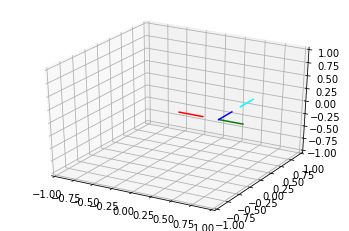

In [14]:
x = np.array([0, 0.1, 0.2, 0.3])
y = np.array([0, 0, 0, 0])
z = np.array([0, 0, 0, 0])

x_ = x + 0.5

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

# X axis
ax.plot3D(x, y, z, 'red')
ax.plot3D(x_, y, z, 'green')


# Y axis
x = np.array([0.5, 0.5, 0.5, 0.5])
y = np.array([0, 0.1, 0.2, 0.3])
z = np.array([0, 0, 0, 0])

y_ = y + 0.5

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

# X axis
ax.plot3D(x, y, z, 'blue')
ax.plot3D(x, y_, z, 'cyan')




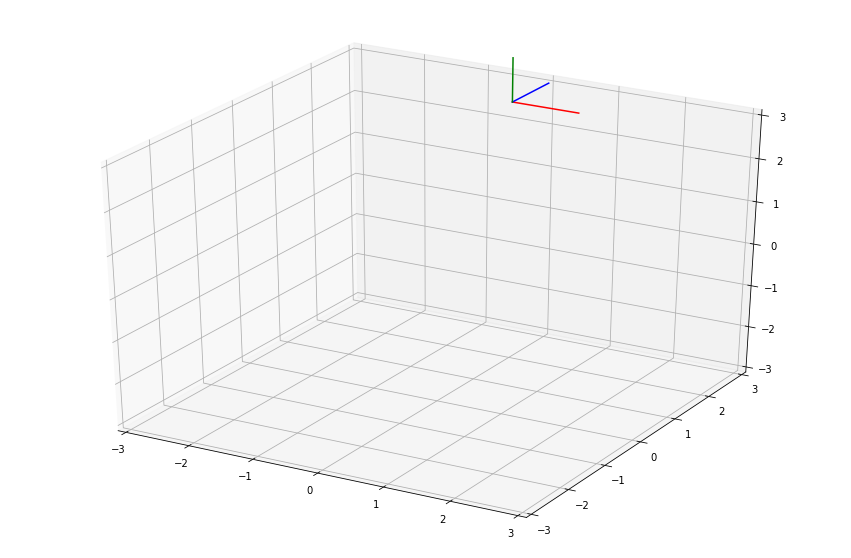

In [16]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')

xlim = 3
ylim = 3
zlim = 3
ax.set_xlim(-xlim, xlim); ax.set_ylim(-ylim, ylim); ax.set_zlim(-zlim, zlim);

plot_unit_cs(ax, 0, 2, 3)

In [23]:
def get_RotX(angle): 
    
    RX = np.array([[1, 0, 0], 
                   [0, np.cos(angle), -np.sin(angle)], 
                   [0, np.sin(angle), np.cos(angle)]])
    
    return RX

def get_RotY(angle): 
    
    RY = np.array([[np.cos(angle), 0, np.sin(angle)], 
                   [0, 1, 0], 
                   [-np.sin(angle), 0, np.cos(angle)]])
    return RY
    
def get_RotZ(angle): 
    
    RZ = np.array([[np.cos(angle), -np.sin(angle), 0],
                   [np.sin(angle), np.cos(angle), 0], 
                   [ 0, 0, 1]] )
    
    return RZ
    


In [56]:
def getRotComplete(angX, angY, angZ, order='XYZ'): 
    
    RX = get_RotX(angX)
    RY = get_RotY(angY)
    RZ = get_RotZ(angZ)
    
    R_ = {'X': RX, 'Y': RY, 'Z': RZ}
    
    R = np.eye(3, 3)
    
    for i in list(order):
        R = np.matmul(R, R_[i])
    
    return R
    
    

In [57]:
RX = get_RotX(30)
RY = get_RotY(45)
RZ = get_RotZ(45)


In [58]:
print(RX); print(RY); print(RZ)

[[ 1.          0.          0.        ]
 [ 0.          0.15425145  0.98803162]
 [ 0.         -0.98803162  0.15425145]]
[[ 0.52532199  0.          0.85090352]
 [ 0.          1.          0.        ]
 [-0.85090352  0.          0.52532199]]
[[ 0.52532199 -0.85090352  0.        ]
 [ 0.85090352  0.52532199  0.        ]
 [ 0.          0.          1.        ]]


In [59]:
getRotComplete(25, 30, 30, 'XYZ')

array([[ 0.02379351,  0.15240531, -0.98803162],
       [-0.95916861,  0.28209711,  0.02041545],
       [ 0.28183229,  0.94720317,  0.15289447]])

In [60]:
print(np.eye(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [76]:
def rotate_unit_cs(R, p): 
    
    x_, y_, z_ = p[0], p[1], p[2]
    x, y, z = get_x_axis(x_, y_, z_)
    
    # Rotate x axis with R rotation matrix
    for i, (xi, yi, zi) in enumerate(zip (x, y, z)): 
        p_ = np.array([xi, yi, zi])
        p_ = np.matmul(R, p_)
    
        x[i], y[i], z[i] = p_[0], p_[1], p_[2]
    
    ax.plot3D(x, y, z)

def plot_unit_cs(ax, x_, y_, z_): 
    
    # X axis plot 
    x, y, z = get_x_axis(x_, y_, z_)
    ax.plot3D(x, y, z, 'red')
    # Y axis plot
    x, y, z = get_y_axis(x_, y_, z_)
    ax.plot3D(x, y, z, 'blue')
    # Z axis plot
    x, y, z = get_z_axis(x_, y_, z_)
    ax.plot3D(x, y, z, 'green')
    
def rotate_axis(R, axis): 
    
    x, y, z = axis[0], axis[1], axis[2]
    
    # Rotate x axis with R rotation matrix
    for i, (xi, yi, zi) in enumerate(zip (x, y, z)): 
        p_ = np.array([xi, yi, zi])
        p_ = np.matmul(R, p_)
    
        x[i], y[i], z[i] = p_[0], p_[1], p_[2]
        
    return x, y, z
    
    

In [78]:
p = [0, 0, 0]
R = getRotComplete(0, 0, 90, 'XYZ')

x, y, z = rotate_axis(R, get_x_axis(0, 0, 0))
plot

In [82]:
def plot_cs(ax, R, p, label='L0'): 
    
    x_, y_, z_ = p[0], p[1], p[2]
    
    # X axis plot 
    x, y, z = rotate_axis(R, get_x_axis(x_, y_, z_))
    ax.plot3D(x, y, z, 'red')
    # Y axis plot
    x, y, z = rotate_axis(R, get_y_axis(x_, y_, z_))
    ax.plot3D(x, y, z, 'blue')
    # Z axis plot
    x, y, z = rotate_axis(R, get_z_axis(x_, y_, z_))
    ax.plot3D(x, y, z, 'green')

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


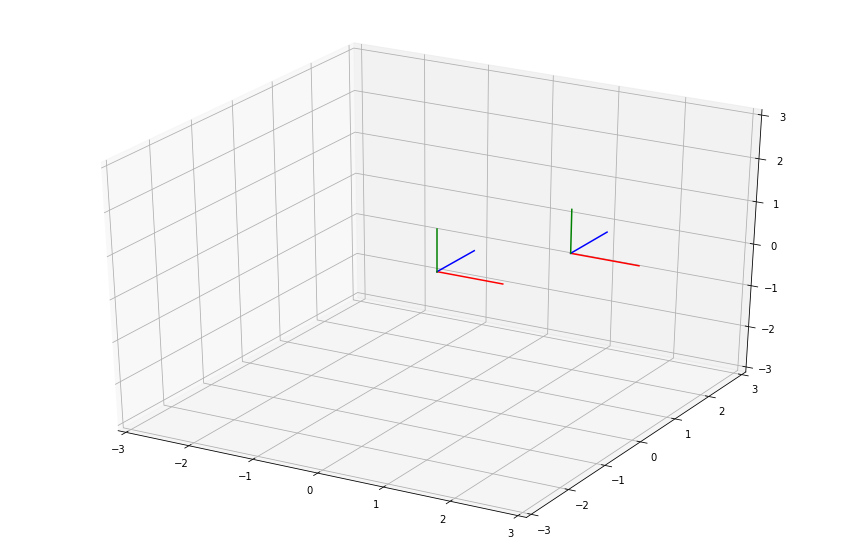

In [101]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')

xlim = 3
ylim = 3
zlim = 3
ax.set_xlim(-xlim, xlim); ax.set_ylim(-ylim, ylim); ax.set_zlim(-zlim, zlim);

R = getRotComplete(0, 0, 0, 'XYZ')
plot_cs(ax, R, [0, 0, 0])

R = getRotComplete(0, 0, 0, 'XYZ')

print(R)
plot_cs(ax, R, [2, 0, 1])